In [ ]:
!pip install pycaret

##Abstract:

Employee attrition is downsizing in any organization where employees resign. Employees are valuable assets of any organization. It is necessary to know whether the employees are dissatisfied or whether there are other reasons for leaving their respective jobs.

Nowadays, for better opportunities, employees are eager to move from one organization to another. But if they quit their jobs unexpectedly, it can result in a huge loss for the organization. A new hire will consume money and time, and newly hired employees will also take time to make the respective organization profitable.

Retaining skilled and hardworking employees is one of the most critical challenges many organizations face. Therefore, by improving employee satisfaction and providing a desirable working environment, we can certainly reduce this problem significantly.

##Employee Future Prediction Shap (Model Interpretability)

Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

 




In [ ]:
!pip install shap
!pip install numpy==1.20

# Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Importing Packages
import seaborn as sns
import math 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
from scipy.stats import norm, skew #for some statistics
from scipy import stats

# Reading Data

In [7]:
from google.colab import files 
uploaded = files.upload()

Saving Employee.csv to Employee.csv


In [8]:
employee_fut = pd.read_csv("/content/Employee.csv")

# Data Profile

In [9]:
employee_fut.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# Describing Data set

In [10]:
employee_fut.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


# DataTypes

In [11]:
#DataTypes
employee_fut.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

Both numerical and categorial data types are present in the data set.

In [12]:
#Missing_Values
employee_fut.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [13]:
employee_fut.Education.unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [14]:
employee_fut.Education.isna().sum()

0

In [15]:
employee_fut.Education

0       Bachelors
1       Bachelors
2       Bachelors
3         Masters
4         Masters
          ...    
4648    Bachelors
4649      Masters
4650      Masters
4651    Bachelors
4652    Bachelors
Name: Education, Length: 4653, dtype: object

In [16]:
employee_fut = pd.get_dummies(employee_fut)

In [17]:
employee_fut.dtypes

JoiningYear                  int64
PaymentTier                  int64
Age                          int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
Education_Bachelors          uint8
Education_Masters            uint8
Education_PHD                uint8
City_Bangalore               uint8
City_New Delhi               uint8
City_Pune                    uint8
Gender_Female                uint8
Gender_Male                  uint8
EverBenched_No               uint8
EverBenched_Yes              uint8
dtype: object

Changing data type from uint to int

In [18]:
#changing data type from uint to int:
employee_fut['Education_Bachelors']=employee_fut['Education_Bachelors'].astype(int)
employee_fut['Education_Masters']=employee_fut['Education_Masters'].astype(int)
employee_fut['Education_PHD']=employee_fut['Education_PHD'].astype(int)
employee_fut['City_Bangalore']=employee_fut['City_Bangalore'].astype(int)
employee_fut['City_New Delhi']=employee_fut['City_New Delhi'].astype(int)
employee_fut['City_Pune']=employee_fut['City_Pune'].astype(int)
employee_fut['EverBenched_No']=employee_fut['EverBenched_No'].astype(int)
employee_fut['EverBenched_Yes']=employee_fut['EverBenched_Yes'].astype(int)
employee_fut['Gender_Male']=employee_fut['Gender_Male'].astype(int)
employee_fut['Gender_Female']=employee_fut['Gender_Female'].astype(int)

In [19]:
employee_fut.dtypes

JoiningYear                  int64
PaymentTier                  int64
Age                          int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
Education_Bachelors          int64
Education_Masters            int64
Education_PHD                int64
City_Bangalore               int64
City_New Delhi               int64
City_Pune                    int64
Gender_Female                int64
Gender_Male                  int64
EverBenched_No               int64
EverBenched_Yes              int64
dtype: object

In [20]:
employee_fut_new= employee_fut.copy()

##NUMERICAL VARIABLES


<Figure size 576x360 with 0 Axes>

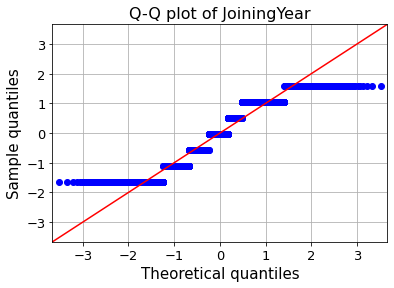

<Figure size 576x360 with 0 Axes>

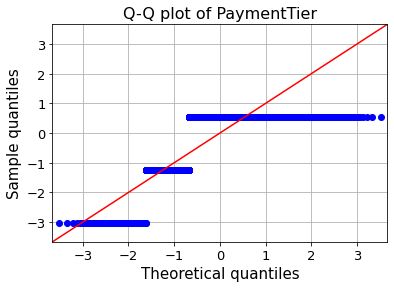

<Figure size 576x360 with 0 Axes>

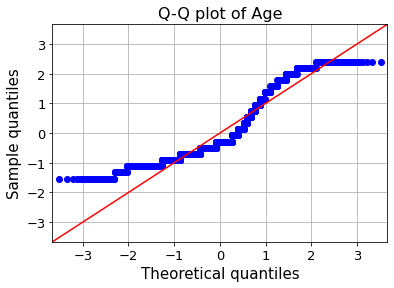

<Figure size 576x360 with 0 Axes>

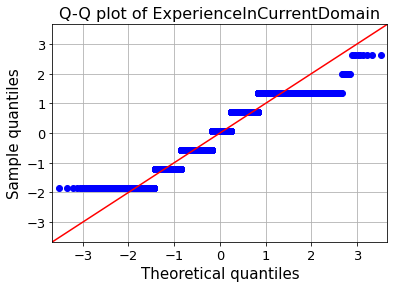

In [21]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=employee_fut[['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

#Building the Model Train and Test split:



In [24]:
from sklearn.model_selection import  train_test_split

X = employee_fut[ ['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain' ,'Education_Bachelors','Education_Masters','Education_PHD','City_Bangalore','City_New Delhi','City_Pune','Gender_Female','Gender_Male','EverBenched_No','EverBenched_Yes']]

y = employee_fut['LeaveOrNot']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Logistic Regression:

In [25]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Print the prediction accuracy
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7110633727175081


#Intercept

In [28]:
print(model.intercept_)

[-0.00371872]


# Coefficients

In [29]:
coef=pd.DataFrame(zip(X_train.columns, np.transpose(model.coef_[0])), columns=['features', 'coef']).sort_values(by=['coef'])

In [30]:
coef.head(50)

,features,coef
8,City_New Delhi,-0.589011
11,Gender_Male,-0.472866
4,Education_Bachelors,-0.404588
1,PaymentTier,-0.387012
12,EverBenched_No,-0.330704
6,Education_PHD,-0.168444
3,ExperienceInCurrentDomain,-0.057065
2,Age,-0.029811
7,City_Bangalore,-0.027214
0,JoiningYear,0.000937


City_New Delhi is important feature Negatively and City_Pune is important feature positively. 

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict for test dataset
y_pred = dt.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, y_pred))

0.8259935553168636


# Interpreting the Nodes of Decision Tree

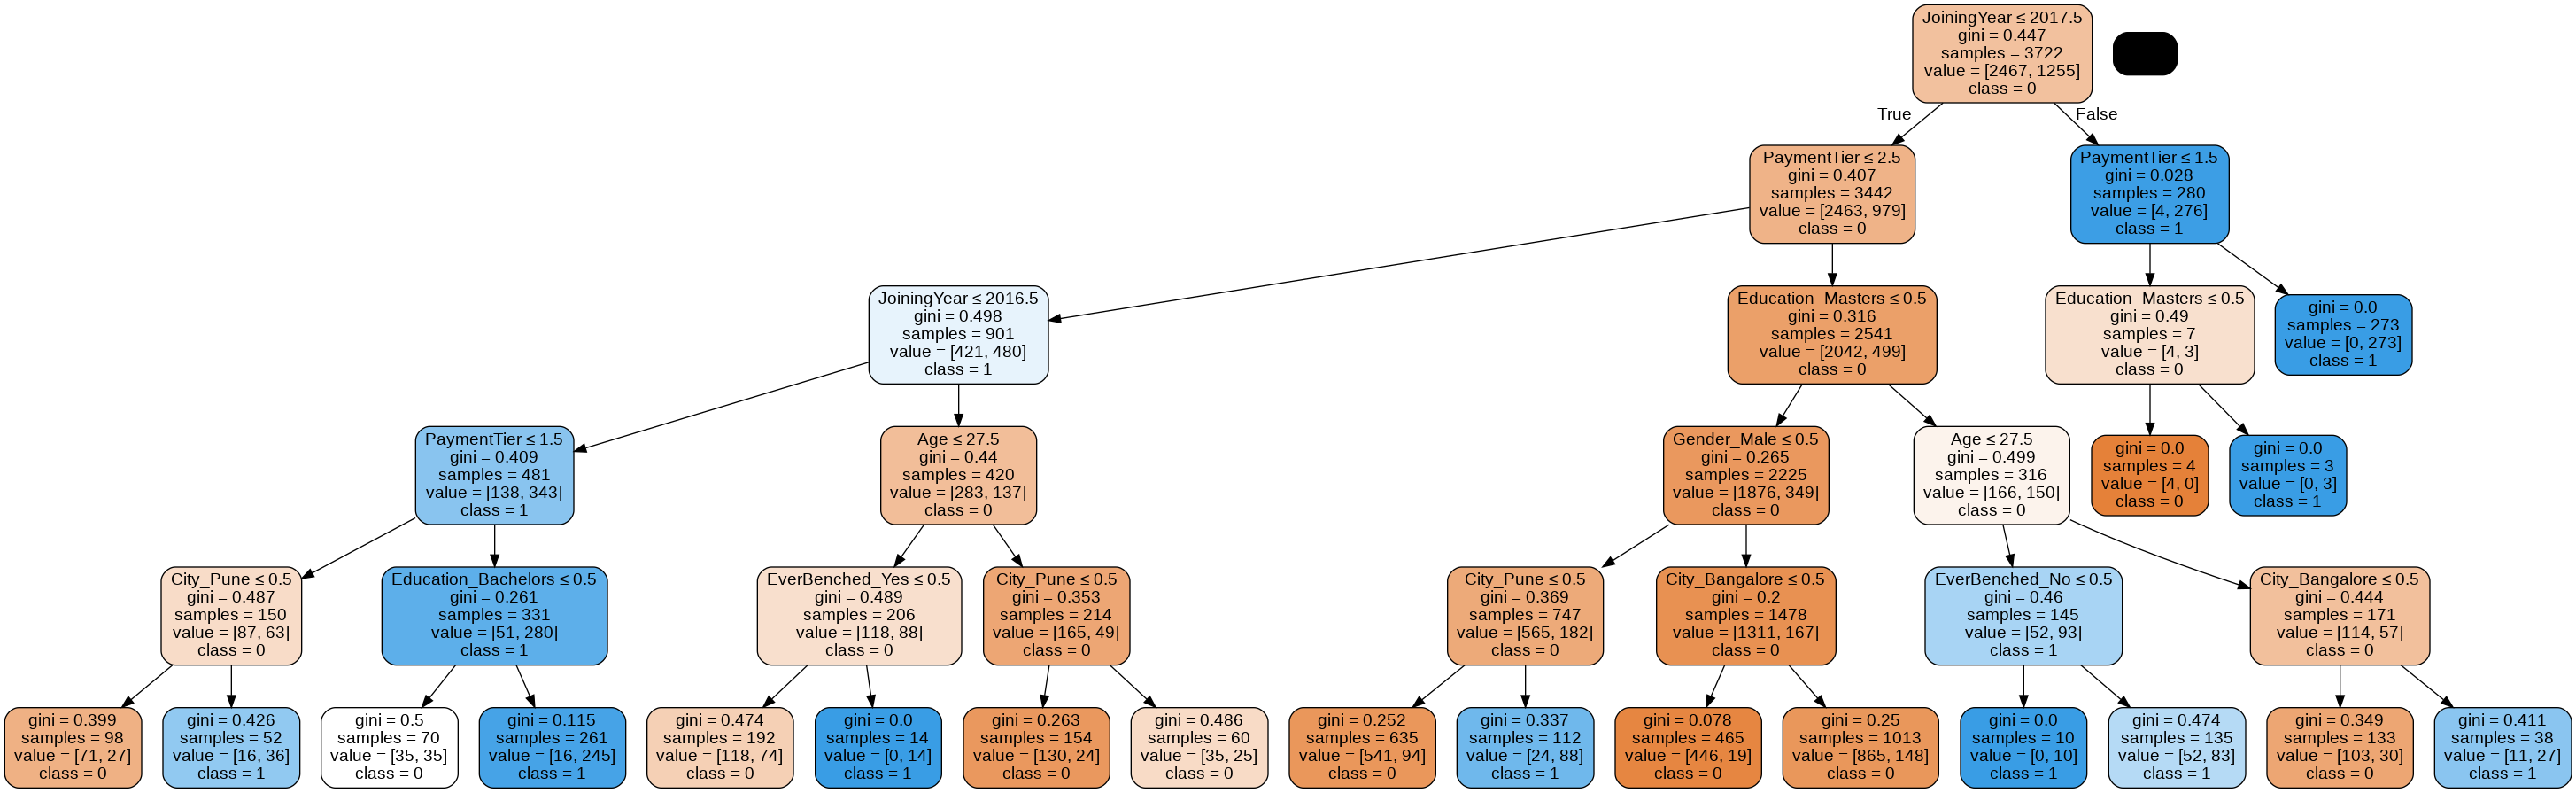

In [34]:
from six import StringIO
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

Here the split start with Joining Year and if value is less than or greater than 2017.5 than they split into PaymentTier.


# AutoML - PyCaret Library

In [36]:
# importing classification
from pycaret.classification import *

#Setting up the classifier

In [37]:
clf1 = setup(data = employee_fut, 
             target = 'LeaveOrNot',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=5,
             fix_imbalance=True,
             silent = True)

,Description,Value
0,session_id,7503
1,Target,LeaveOrNot
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4653, 15)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='LeaveOrNot', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('dummy', Dummify(target='LeaveOrNot')),
                ('fix_perfect', Remove_100(target='LeaveOrNot')),
                ('clean_names', Clean_Colum_Names()

# Model Comparison & Evaluation

In [38]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8274,0.8581,0.6702,0.7968,0.7280,0.6030,0.6079,0.310
gbc,Gradient Boosting Classifier,0.8216,0.8532,0.6604,0.7874,0.7181,0.5891,0.5942,0.434
et,Extra Trees Classifier,0.8216,0.8108,0.6542,0.7926,0.7163,0.5880,0.5941,0.500
rf,Random Forest Classifier,0.8155,0.8335,0.6568,0.7737,0.7102,0.5762,0.5806,0.514
dt,Decision Tree Classifier,0.7992,0.7791,0.6408,0.7417,0.6874,0.5407,0.5440,0.096
lda,Linear Discriminant Analysis,0.7866,0.8140,0.6631,0.7018,0.6814,0.5213,0.5221,0.110
ridge,Ridge Classifier,0.7863,0.0000,0.6631,0.7011,0.6811,0.5207,0.5215,0.086
ada,Ada Boost Classifier,0.7845,0.8097,0.6346,0.7089,0.6695,0.5104,0.5122,0.254
lr,Logistic Regression,0.7808,0.8171,0.6791,0.6830,0.6809,0.5139,0.5141,1.486
svm,SVM - Linear Kernel,0.7765,0.0000,0.6541,0.6953,0.6660,0.4997,0.5066,0.112


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7503, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


Lgbm out performers the other models.

#Hyperparameter Tuning

In [40]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8405,0.8759,0.7200,0.7980,0.7570,0.6388,0.6406
1,0.8206,0.8586,0.6711,0.7784,0.7208,0.5896,0.5931
2,0.8341,0.8517,0.6875,0.8021,0.7404,0.6195,0.6235
3,0.8203,0.8504,0.6920,0.7635,0.7260,0.5928,0.5944
4,0.8372,0.8637,0.6920,0.8073,0.7452,0.6266,0.6306
Mean,0.8305,0.8601,0.6925,0.7899,0.7379,0.6135,0.6164
Std,0.0085,0.0093,0.0157,0.0164,0.0131,0.0192,0.0193


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.8, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=81, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=160, n_jobs=-1, num_leaves=20, objective=None,
               random_state=7503, reg_alpha=1e-06, reg_lambda=2, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [44]:
#Installing support library
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 17.9 MB/s 
     |████████████████████████████████| 25.3 MB 88.6 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


# Model Interpretability using SHAP

In [45]:
import shap

In [46]:
X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution
sample_ind = 20

#Interpret Logistic Regression Model using SHAP

In [48]:
# compute the SHAP values for the linear model
explainer_log = shap.Explainer(model.predict, X100)
shap_values_log = explainer_log(X_train)

Permutation explainer: 3723it [04:47, 12.83it/s]


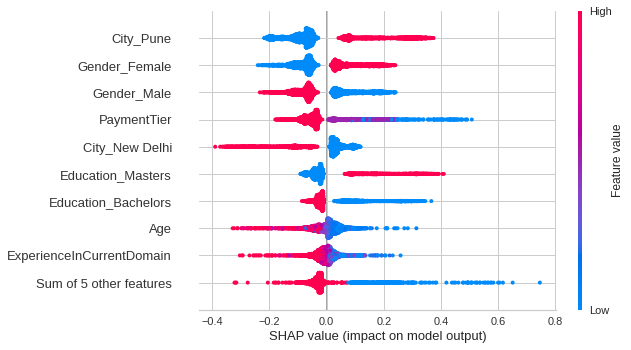

In [49]:
shap.plots.beeswarm(shap_values_log)

If the person is from pune is more likely to leave the company.

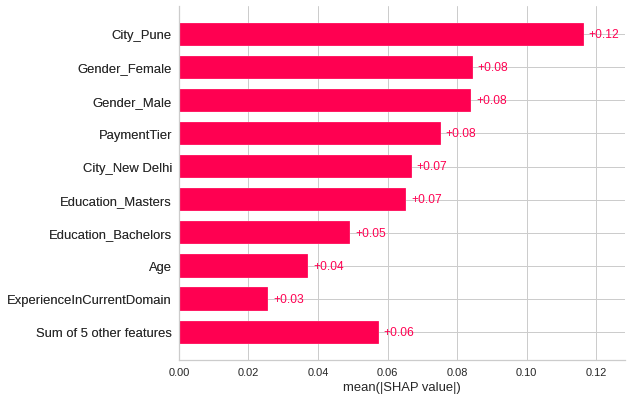

In [50]:
shap.plots.bar(shap_values_log)

Here we are plotting the shap values.

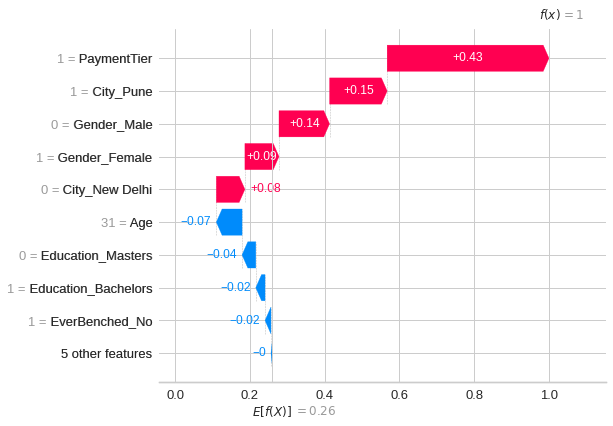

In [51]:
shap.plots.waterfall(shap_values_log[sample_ind], max_display=10)

43% of employee may leave company because of PaymentTier. 15% of employees  may leaving company because they belong from pune. If Age is 31 than 7% of the employee will not leave. Also if an Employee has not done Masters he/she will not leave the company.

# Interpreting Decision Tree Model using SHAP

In [57]:
# compute the SHAP values for the linear model
explainer_dt = shap.Explainer(dt.predict, X100)
shap_values_dt = explainer_dt(X)

Permutation explainer: 4654it [03:45, 19.61it/s]                          


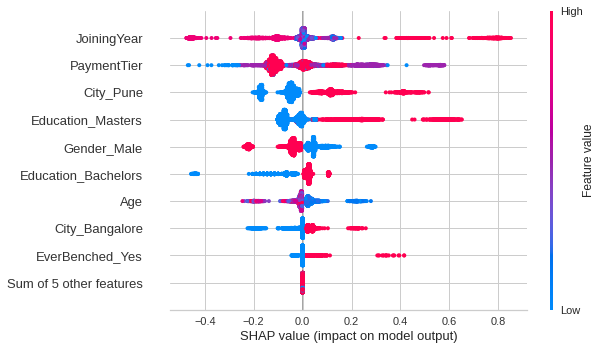

In [58]:
shap.plots.beeswarm(shap_values_dt)

Accodring to the decesion tree JoiningYear impacts the most on wether the employee will leave or not the company. Payement Tier impacts second most according to the decesion tree.

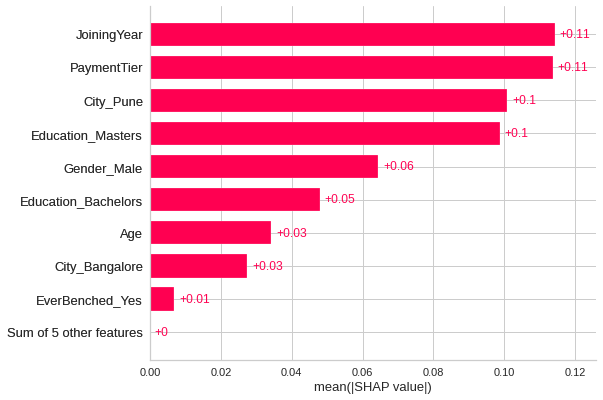

In [59]:
shap.plots.bar(shap_values_dt)

We can see JoiningYear and PaymentTier impacting the most on the bra graph.

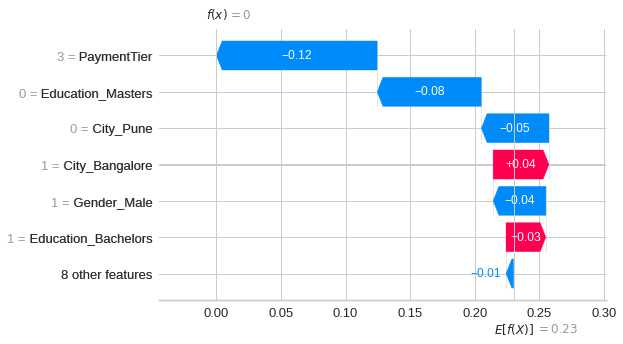

In [60]:
shap.plots.waterfall(shap_values_dt[sample_ind], max_display=7)

Accordindly to waterfall plot above if the PaymentTier is 3 there is 12% less chance the employee will leave and if an employee has not done master's than 8 % chances are there that he will not leave. If a employee belongs to banglore than there 4% chance he will leave the company.

# Interpreting Best Tuned Model -  Light GBM using SHAP

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=81, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=160, n_jobs=-1, num_leaves=20, objective=None,
               random_state=7503, reg_alpha=1e-06, reg_lambda=2, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


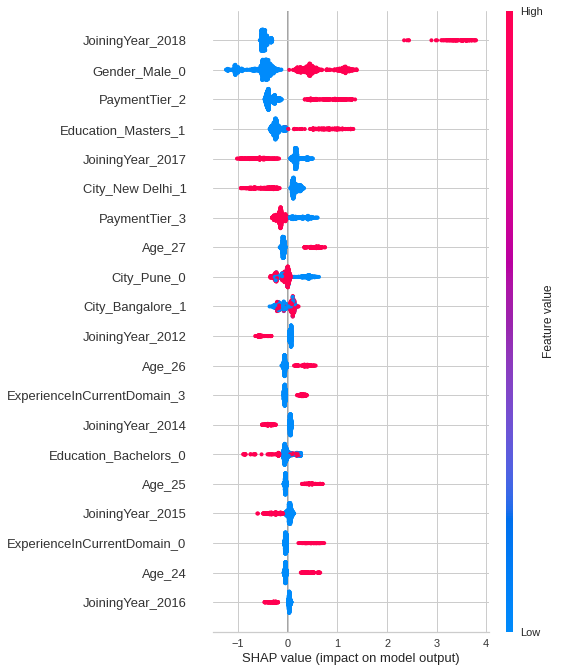

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [62]:
interpret_model(tuned_model)

After interpreting best tune model (Light GBM) the following feautures are important: JoiningYear_2018, Gender_Male_0, PaymentTier_2, Education_Masters_1, JoiningYear_2017, City_NewDelhi_1 and PaymentTier3.

# Conclusion
We have implemented different models using SHAP and we performed mutiple model as per the shapley values. The importance feature present are JoiningYear_2018, Gender_Male_0, PaymentTier_2, Education_Masters_1, JoiningYear_2017, City_NewDelhi_1 and PaymentTier3.

#License

Copyright (c) 2022 Rahul-Kodate

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.